# Preparing a Plot from Time Series Data

The data here is one week's worth of my heart rate data in 10s intervals.

## Requirements

In [1]:
library(jsonlite)
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
jsonData <- readLines("data/pulse-rate-ts.json", skipNul = TRUE)

In [3]:
jsonData <- gsub('\'', '\"', jsonData)

In [4]:
heartdata <- data.frame()
for (entry in jsonData) {
    #cleaned <- gsub("\n", "", entry)
    converted <- fromJSON(entry)
    heartentry <- converted$`activities-heart-intraday`$dataset
    heartentry$date <- converted$`activities-heart`$dateTime
    heartdata <- rbind(heartdata, heartentry)
    }

In [5]:
(heartdata <- as_tibble(heartdata))

time,value,date
<chr>,<int>,<chr>
00:00:04,75,2017-05-01
00:00:09,77,2017-05-01
00:00:19,77,2017-05-01
00:00:29,79,2017-05-01
00:00:44,79,2017-05-01
00:00:49,80,2017-05-01
00:00:54,80,2017-05-01
00:00:59,81,2017-05-01
00:01:04,82,2017-05-01


The time format (%H:%M:%S) and date format (%Y-%m-%d) are excellent and are already the defaults for the relevant parse_* functions.

In [6]:
heartdata$date <- parse_date(heartdata$date)
heartdata$time <- parse_time(heartdata$time)

In [7]:
hearttheme <- theme_bw() +
theme(
    axis.text = element_text(size=6),
    axis.text.x = element_text(angle=30, hjust=1),
    #panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
)
theme_set(hearttheme)

In [8]:
breaks <- paste(0:24,":00",sep="")

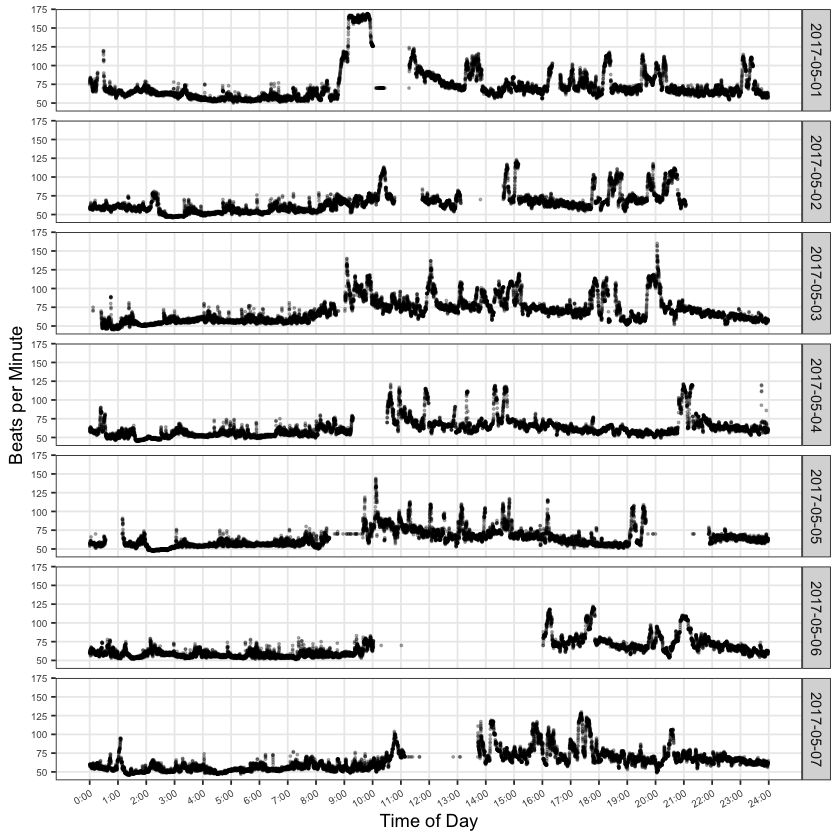

In [9]:
ggplot(heartdata, aes(x=time, y=value)) +
geom_point(alpha=0.3, shape=20, size=0.8) +
scale_x_time(breaks=hm(breaks), labels=breaks) +
facet_grid(date~.) +
xlab("Time of Day") +
ylab("Beats per Minute")
#scale_y_continuous(breaks=beatrange, name="Heart Rate (bpm)")

In [11]:
#ggsave("heartdata_week.pdf", width=8, height=14, units="in")

In [12]:
#minbeat = floor(min(heartdata$value/10))*10
#maxbeat = ceiling(max(heartdata$value/10))*10
#beatrange = seq(minbeat,maxbeat,by=10)